In [ ]:
#INstalling Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading data
titanic=pd.read_csv("titanic.csv")

## Exploratory Data Analysis

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We will only need the following colums to check whether person will survive:

1. Pclass
2. Sex
3. Age
4. Fare

In [16]:
columns=["Pclass","Sex","Age","Fare","Survived"]
t_data=titanic[columns]
t_data

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [17]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [18]:
t_data.describe()

,Pclass,Age,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.383838
std,0.836071,14.526497,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000
50%,3.000000,28.000000,14.454200,0.000000
75%,3.000000,38.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [19]:
t_data.shape

(891, 5)

In [20]:
t_data.dtypes

Pclass        int64
Sex          object
Age         float64
Fare        float64
Survived      int64
dtype: object

In [21]:
t_data.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

### Data Cleaning

In [22]:
t_data.dropna(inplace=True)#Removes rows with missing Values
t_data.isnull().sum()

C:\Users\SHUBHAM SARKAR\AppData\Local\Temp\ipykernel_18452\2478774615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_data.dropna(inplace=True)#Removes rows with missing Values


Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

### Visualizations

In [24]:
pd.crosstab(t_data.Sex,t_data.Survived)

Survived,0,1
Sex,,
female,64,197
male,360,93


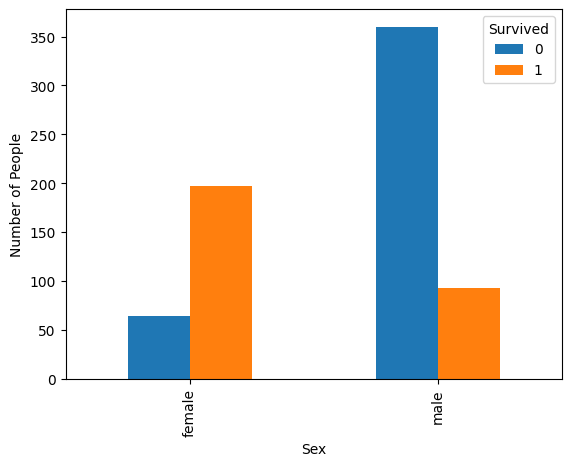

In [26]:
pd.crosstab(t_data.Sex,t_data.Survived).plot(kind="bar")
plt.ylabel("Number of People")
plt.show()

In [27]:
pd.crosstab(t_data.Pclass,t_data.Survived)

Survived,0,1
Pclass,,
1,64,122
2,90,83
3,270,85


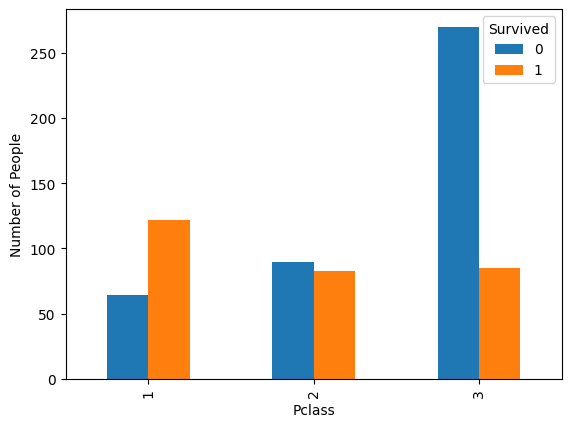

In [28]:
pd.crosstab(t_data.Pclass,t_data.Survived).plot(kind="bar")
plt.ylabel("Number of People")
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

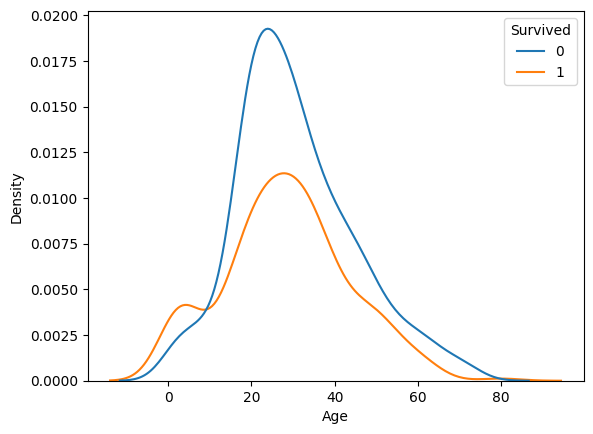

In [29]:
sns.kdeplot(data=t_data,x="Age",hue="Survived")

In [35]:
df=pd.get_dummies(t_data).astype(int)
df

,Pclass,Age,Fare,Survived,Sex_female,Sex_male
0,3,22,7,0,0,1
1,1,38,71,1,1,0
2,3,26,7,1,1,0
3,1,35,53,1,1,0
4,3,35,8,0,0,1
...,...,...,...,...,...,...
885,3,39,29,0,1,0
886,2,27,13,0,0,1
887,1,19,30,1,1,0
889,1,26,30,1,0,1


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(["Survived"],axis="columns"),df.Survived,test_size=0.2)

In [37]:
x_train

,Pclass,Age,Fare,Sex_female,Sex_male
536,1,45,26,0,1
372,3,19,8,0,1
310,1,24,83,1,0
231,3,29,7,0,1
307,1,17,108,1,0
...,...,...,...,...,...
100,3,28,7,1,0
525,3,40,7,0,1
698,1,49,110,0,1
559,3,36,17,1,0


In [38]:
y_train

536    0
372    0
310    1
231    0
307    1
      ..
100    0
525    0
698    0
559    1
208    1
Name: Survived, Length: 571, dtype: int64

In [39]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
model.score(x_test,y_test)

0.7342657342657343

In [42]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[72,  8],
       [30, 33]])

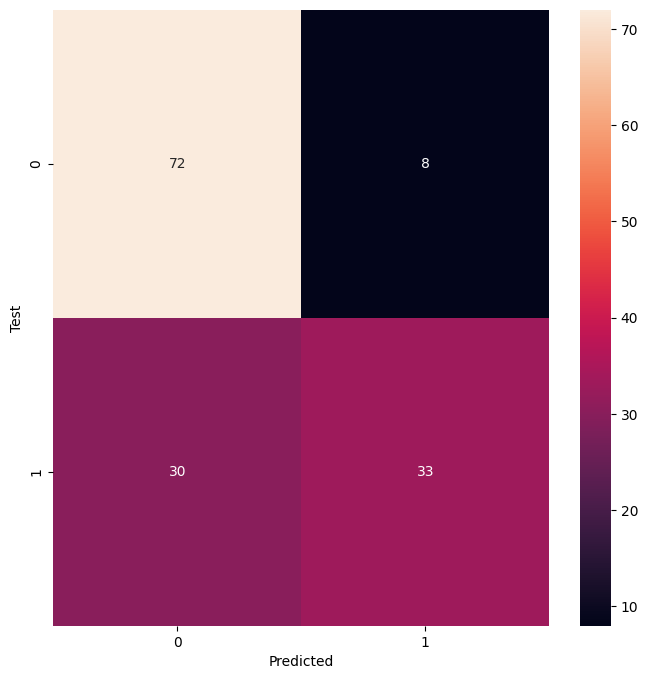

In [44]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Test")
plt.show()